# Introduction to Probability

-----

Probability is a concept that is generally familiar to most people. We use probabilities frequently, such as in weather forecasts where the probability of rain might be 60%, or in games of chance where the roll of a die might determine the winner. But what does probability really mean? Or, more importantly, how do we calculate and use probabilities effectively?

This notebook explores the concept of probability, including how to calculate probabilities from theoretical expectations and from the distribution of features in a particular data set. This will lead us through he world of _combinations_, to empirical probabilities and probability density functions, and finally to Bayes theorem. Before we get started, however, we first perform our standard Python imports.

-----

In [1]:
# Set up Notebook

%matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

sns.set(style="white")

## Combinatorial Analysis

A basic problem in computing probabilities is determining the likelihood of a particular event. In some cases, this can be done simply by counting possible states, such as with flipping a coin. In others, however, a more formal approach can help derive insights more quickly. This approach is known as combinatorial analysis, where one determines the number of different states that are possible from the initial conditions. For example, given a single coin, there are only two possible states when flipping the coin: **heads** (H) or **tails** (T). With more coins, the space of possible events grows quickly, and if multiple coins are used, determining the possible end states becomes a much more complex problem. 

For these more complex cases, there are two fundamental concepts that can be applied: permutations and combinations. The difference between these two concepts is that with permutations the order of the values is important, for example, when entering the values for a security code or a telephone number, while for combinations the order is not important, such as selecting lottery numbers or when purchasing items that are used to create a food item. We will walk through each of these cases in more detail.

### Permutations

When we combine things together and the order does matter, we have a [statistical **permutation**][mc]. Given a set of n values, a permutation is the number of different ways that the r values can be selected from the set. As a simple example, consider our set to be the first three numbers: $1, 2, 3$. Before proceeding, there are two approaches to this problem.

1. Permutation with replacement, where we select an item from the input set and replace it when we are done.
2. Permutation without replacement, where we select an item from the input set, and discard it when we are done.

For the first case, we select a number, and replace it back in the input set. So, every time we select a number, we have three choices. Thus, if we pick one number, we have three permutations, if we select two we have $3 * 3$, or $9$ permutations, and so on. In general, if we have n objects in our input set, we have n options each time we select another one; thus, if we select two objects, we have $n * n$, or $n^2$. This leads to the general formula for permutation with replacement:

$$ ^nP_r = n^r $$

This is demonstrated in the following code cell, where we compute the permutations with replacement by using the `product` function to compute the possible permutations in this case.

-----
[mc]: http://www.mathsisfun.com/combinatorics/combinations-permutations.html

In [2]:
# Number of items in our input set
n = 4

# number of items to select at one time
r = 2

# Create our data
data = np.arange(n)

# Below is specific to this example

print('Input data = {}'.format(data))
print(f'Possible permutations = {(n**r)}')

from itertools import product

# Compute and display actual permutations (with replacement)
for cm in product(data, repeat=r):
    for c in cm:
        print(f'{c} ', end='')
    print()

Input data = [0 1 2 3]
Possible permutations = 16
0 0 
0 1 
0 2 
0 3 
1 0 
1 1 
1 2 
1 3 
2 0 
2 1 
2 2 
2 3 
3 0 
3 1 
3 2 
3 3 


-----

On the other hand, permutation without replacement provides fewer options with each new selection. In the previous example [1, 2, 3], we have three ways to select our first number, two ways to select the second (since one number has been removed from the input set), and only one way to select the final number. Note that we cannot select more than three numbers from this input set without replacement. We can express this mathematically as $ 3 \times 2 \times 1$, which is used so often that a shorthand notation has been developed called **factorial**, which we represent by using the exclamation mark ($!$). Thus, in our specific case, we have $ 3 \times 2 \times 1 = 3!$, or in general $n!$ for an input set that has $n$ objects. 

If we were only interested in selecting one number from the input set, the answer is three. But what if our input set contained the numbers 1, 2, 3, and 4, and we wanted to know how many ways we could pick two numbers without replacement? In this case, we have four ways to select the first number, and three ways to select the second number, or $4 \times 3$. Or, alternatively, we had to remove the last two multiplications, which we can do by writing out the full multiplication, as was the case for permutations with replacement, and dividing out by the number of ways that we aren't interested in counting, which in this case would be $2 \times 1$. To write this in a simple math form, we can generalize this to select $r$ objects from a set of $n$ objects:

$$ ^nP_r = \frac{n!}{(n - r)!} $$

In the following code example, we first compute the number from our formula before using the built-in function `permutations` to generate and display the available permutations.

------

In [3]:
# We reuse the data and values for n and r from above.

# Display data
print('Input data = {}'.format(data))

from math import factorial
# Compute our factorials and display theoretical permutation count
nf = factorial(n)
nrf = factorial(n - r)
print(f'Possible permutations = {nf/nrf}')

from itertools import permutations

# Compute and display actual permutations
for pm in permutations(data, r):
    for p in pm:
        print(f'{p} ', end='')
    print()

Input data = [0 1 2 3]
Possible permutations = 12.0
0 1 
0 2 
0 3 
1 0 
1 2 
1 3 
2 0 
2 1 
2 3 
3 0 
3 1 
3 2 


-----

<font color='red' size = '5'> Student Exercise </font>

Change the value of $r$ in the previous code cell (e.g., to 2 or 3) and see how the results change. Does the output make sense? Now change the value of n and r (keep them relatively small!). Do the new results make sense?

-----

### Combinations

When we combine things together but the order doesn't matter, we have a statistical **combination**. [Combinations][mc] are similar to permutations, described previously. However, since the order is not important in combinations, we have fewer options to count, thus the result is smaller. When we compute the number of options in a combination, we once again need to differentiate between computing a combination with replacement and without replacement.

First, we explore combinations without replacement. In this case, we can compute the number of permutations without replacement, which as shown earlier is given by 

$$ ^nP_r = \frac{n!}{(n - r)!} $$

However, since order is not important, this number must be reduced. Specifically, if we are selecting three items, there are $3! = 6$ ways they can be ordered. Or, in general, if are selecting $r$ items from a set of $n$, we have $r!$ ways to order the selection. Thus, in combination without replacement, we must reduce the permutation count by $r!$. Since this particular combination is used so frequently, it has a special name, $n \choose r$.

$$ ^nC_r = {n \choose r} = \frac{n!}{r!(n - r)!}$$

Combination without replacement is demonstrated in the following code cell, where we compute the number of different combinations for our input data set.

-----
[mc]: http://www.mathsisfun.com/combinatorics/combinations-permutations.html

In [4]:
# Number of items in our input set
n = 4

# number of items to select at one time
r = 2

# Create our data
data = np.arange(n)

print('Input data = {}'.format(data))

# Compute our factorials and display theoretical combination count
nf = factorial(n)
nrf = factorial(n - r)
rf =  factorial(r)

print(f'Possible combinations = {nf/(nrf * rf)}')

from itertools import combinations

# Compute and display actual combinations
for cm in combinations(data, r):
    for c in cm:
        print(f'{c} ', end='')
    print()

Input data = [0 1 2 3]
Possible combinations = 6.0
0 1 
0 2 
0 3 
1 2 
1 3 
2 3 


-----

Combination with replacement is more complex, thus we simply present the formula: 

$$ ^nC_r = {r + n - 1 \choose r} = \frac{(r + n - 1)!}{r!(n - 1)!}$$

The formula is derived in [different places][mc] and is demonstrated in the following code cell.

-----
[mc]: http://www.mathsisfun.com/combinatorics/combinations-permutations.html

In [5]:
# We reuse the data and values for n and r from above.

print('Input data = {}'.format(data))

# Compute our factorials and display theoretical combination count
n1f = factorial(n - 1)
rn1f = factorial(r + n - 1)
rf =  factorial(r)

print(f'Possible combinations = {rn1f/(n1f * rf)}')

from itertools import combinations_with_replacement

# Compute and display actual combinations (with replacement)
for cm in combinations_with_replacement(data, r):
    for c in cm:
        print(f'{c} ', end='')
    print()

Input data = [0 1 2 3]
Possible combinations = 10.0
0 0 
0 1 
0 2 
0 3 
1 1 
1 2 
1 3 
2 2 
2 3 
3 3 


-----

<font color='red' size = '5'> Student Exercise </font>

Change the values of $r$ in the previous code cell and see how the results change. Does the output make sense? Now change the value of n and r (keep them relatively small!). Do the new results make sense?

-----

## Probability

One standard approach to estimating probability is to define the probability of an event by the _frequency_ of its occurrence. Thus, for example, we expect that the probability a fair coin comes up heads is 0.5. Formally, this is computed as the number of successes divided by the number of attempts. In general, in the absence of outside information, we follow the [principle of indifference][wpi] and choose uniform probabilities for potential events. Thus we expect:

Coin: $P(H) = \frac{1}{2}$  
Dice: $P(1) = \frac{1}{6}$  
Card: $P(3) = \frac{1}{13}$  

We can demonstrate several of these actions by performing simulations.

-----

### Flipping Coin

First, we will demonstrate computing a probability from a sequence of events by simulating a coin flip. In the following code cell, we assume a fixed probability of _flipping heads_, and simulate flipping a heads ($H$) or tails ($T$) by using the [`choice`][npc] function in the NumPy module to randomly select one of these two outcomes. We display the simulated flips, accumulate the number of heads, and display the ratio of heads to total flips as a probability derived from the frequency of occurrences.

-----
[wpi]: https://en.wikipedia.org/wiki/Principle_of_indifference
[npc]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html

In [6]:
# Simulation probability of flipping heads
ph = 0.5

# Number of coin flips to simulate
num_flips = 25

# Simulate Coin flips
def flip_coin(N, p=0.5):
    prob = [p, (1 - p)]
    return np.random.choice(['H','T'], size=N, p=prob)

# Accumulate flips
flips=flip_coin(num_flips, ph)

# Count Heads
num_heads = np.sum(flips == 'H')

# Display results
print("Flips:", " ".join(flips))
print(f"Number of Heads: {num_heads}")
print(f'P(H) = {num_heads/num_flips} (Number of Heads/Total Flips)')

Flips: T T T H T H T H T T H T T T H T H T H T T H T T T
Number of Heads: 8
P(H) = 0.32 (Number of Heads/Total Flips)


-----

### Rolling Dice

Second, we can provide a more complex example by simulating the rolling of a six-sided dice. In this case, we must randomly select one of six options ($1$, $2$, $3$, $4$, $5$, $6$), which by default we assume all have equal probabilities ($= 1/ 6$). At the end, we accumulate the number of rolls that result in an _ace_ (or $1$), and display the ratio of this sum to the total number of rolls as a probability derived from the frequency of occurrence.

-----

In [7]:
# Assume equal probability over all states
prob_die = 6 * [(1/6)]

# Number of dice rolls
num_rolls = 25

# Simulate a dice roll
def roll_die(N, prob = prob_die):
    return np.random.choice(['1', '2', '3', '4', '5', '6'], size=N, p=prob)

# Accumulate rolls
rolls=roll_die(num_rolls)

# Accumulate rolls of an 'Ace'
num_ones = np.sum(rolls == '1')

#Display results
print("Rolls:", " ".join(rolls))
print(f"Number of Ones: {num_ones}")
print(f'P(1) = {num_ones/num_rolls} (Number of Ones/Total Rolls)')

Rolls: 6 1 2 6 1 1 2 6 1 5 3 3 1 3 1 2 4 4 4 4 5 6 3 4 5
Number of Ones: 6
P(1) = 0.24 (Number of Ones/Total Rolls)


-----


### Bernoulli Trial

If we conduct an experiment, such as flipping a coin or rolling a die, we can define a specific outcome as a success. For example, if the coin shows a head or we roll an ace (or a `1`), we might consider those successful outcomes. An experiment of this type is known as a [**Bernoulli trial**][wbt]. If the probability of success is denoted by $p$, we have the probability of success as $P(1) = p$, and conversely the probability of failure is $P(0) = (1 - p)$. If we let $x$ be a random variable that is determined by this probability, then $X$ is known as a Bernoulli random variable. In addition, we can obtain the **odds** of a successful outcome as the ratio $p/(1 - p)$.

## Binomial Distribution

If we extend the experiment to include more than one trial, we have a binomial experiment, which consists of a set number of statistically independent _Bernoulli trials_. Thus, flipping a coin multiple times is a binomial experiment, since each coin flip is independent. In general, a random variable that is determined from $n$ statistically independent Bernoulli trials, where each trial has probability $p$ of success, follows a Binomial distribution $B(n, p)$. In this case, the probability of exactly $r$ successes is given by

$$p(r) = {n \choose r} p^r (1 - p)^{n - r}$$

To demonstrate, we can calculate the probability of getting an odd roll of a die. Here the probability of success, $p$ is equal to 0.5, since we have three ways of getting an odd roll and six total options ($p = 3/6 = 1/2$). In addition, we have one trial ($n = 1$), and one success ($r = 1$).

$$P(X) = \frac{1!}{1! 0!}\left( \frac{1}{2} \right)^1 \left( \frac{1}{2} \right)^0 = \frac{1}{2} $$

Or, we can calculate the probability of flipping five heads in ten coin tosses. For this example, the probability of getting heads for a fair coin is just 0.5, $n = 10$, and $r=5$, thus

$$P(X) = \frac{10!}{5! (10 - 5)!}\left( \frac{1}{2} \right)^5 \left( \frac{1}{2} \right)^5 \approx 0.246 $$

This distribution can be applied when
- the different trials (i.e., $n$) are statistically independent,
- each trial can only end in one of two states, and
- the probability of success (and failure) is constant for each trial.

As a simple example, in the following code cell, we calculate the probability of flipping different numbers of heads from five _fair_ coins, for which we assume the probability of getting a heads = 0.5.

-----

<font color='red' size = '5'> Important Information </font>

An important issue that arises when performing data analytic tasks is **reproducibility**. The data analyst should obtain consistent results when performing the same analysis, even if the code, programming language, or analysis tool changes. When working with random variables, however, this can be made more difficult since each time a process is executed entirely new data are generated. 

Computers, however, are entirely deterministic systems. Random data generated by traditional computers are not completely random. These processes often start with a seed, which impacts the random sequence that is generated. By reusing the same seed, one can minimize the impact of a random process within a computer program and enable code reproducibility. This can be done for many random number generators, such as those within NumPy, by explicitly setting a global seed, or, preferentially, always specifying the same [random_state][sst] (or seed) to the specific random generator.

For example, if we are using the binomial distribution in the SciPy module, we can specify the seed globally, or we can specify a random state when we sample random variables from the distribution:

```python
# Set global seed
np.random.seed(42)

# Set repeatable local random state
dist = binom(n, p)
data = dist.rvs(10, random_state=42)
```

-----
[sst]: https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html
[wbt]: https://en.wikipedia.org/wiki/Bernoulli_trial

P(0 Heads) =   0.03
P(1 Heads) =   0.16
P(2 Heads) =   0.31
P(3 Heads) =   0.31
P(4 Heads) =   0.16
P(5 Heads) =   0.03


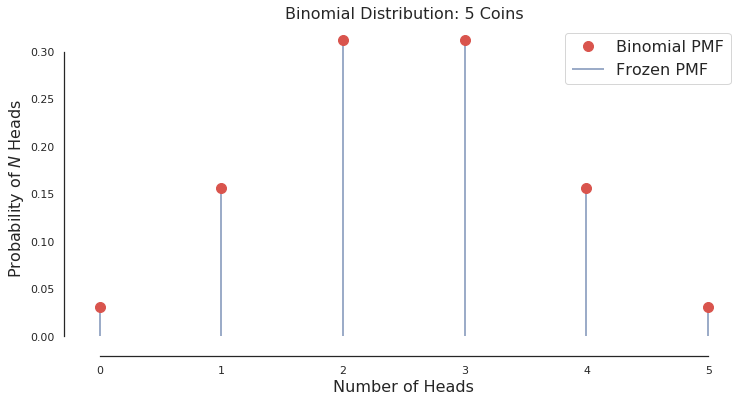

In [8]:
# Number of coins
n = 5

# Simulated probability of heads
ph = 0.5

from scipy.stats import binom

x = np.arange(6)

# Create frozen distribution
rv = binom(n, ph)
pmf = rv.pmf(x)

for idx, pr in enumerate(pmf):
    print(f'P({idx} Heads) = {pr:6.2f}')

# Now plot the binomial distribution for different number of heads in 5 coin flips
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, binom.pmf(x, n, ph), 'o', color=sns.xkcd_rgb["pale red"], ms=10, label='Binomial PMF')

#Plot frozen PMF
ax.vlines(x, 0, pmf, colors=sns.xkcd_rgb["denim blue"], lw=2, alpha=0.5, label='Frozen PMF')

# Decorate plot
ax.set_xlabel('Number of Heads', fontsize=16)
ax.set_ylabel(r'Probability of $N$ Heads', fontsize=16)
ax.set_title('Binomial Distribution: 5 Coins', fontsize=16)
ax.legend(fontsize=16)
sns.despine(offset = 5, trim=True)

-----

The binomial distribution forms the basis for much of probability theory. This distribution is both simple, and yet can be applied in many cases. Given a sample of $n$ events, which each have probability $p$ of succeeding, the mean value is simply $np$, and the variance is $np(p - 1)$. The binomial distribution can be applied to predicting the outcome of (multiple) coin tosses, the expected number of failures when manufacturing parts, or the expected number of fraudulent claims detected (assuming uniform probability of fraud occurring).

### Interpreting Frequency Probabilities

Probabilities are often misinterpreted, and this can easily be demonstrated by simulating flips of a fair coin. Obviously, the probability of obtaining a heads is 0.5 for each coin flip. However, by simulating a number of coin flips, **interesting** patterns will eventually appear, such as a number of heads or tails appear in sequence. When viewing such a pattern, one generally feels that this pattern implies that the opposite result is _overdue_. However, each coin flip is independent of the others, and thus the probability is still equally likely of flipping either a heads or a tails.

We demonstrate this in the following code cell, where we generate a large number of coin flips. Peruse through the simulated flips and take notice of any _patterns_, yet at the end, the probability estimated from the frequency of an event being observed is still very close to the expected value.

-----

In [9]:
# Probabilty of flipping heads
ph = 0.5

# How many times to flip a coin
num_flips = 250

# Function to print out sequence of results from a coin flip
def print_flips(flps, print_width = 50):
    
    # How many coin flip results we have displayed
    count = 0
    
    # We limit to 100 total
    if flps.shape[0] > 100:
        flips = flps[:-100]
    else:
        flips = flps[:]
    
    # Iterate through flips, displaying one at a time.
    for flip in flips:
        count += 1
        print(f'{flip}', end=' ')
        
        # We format to only display print_width flips on one line
        if (count % print_width) == 0:
            print() # Print Newline
    print() # Print newline
    
# Function to generate num_flips coin flips
def make_flips(num_flips, ph):
    
    # Flip coin num_flips number of times
    flips = flip_coin(num_flips, ph)
    
    # Display results
    print_flips(flips)

    # Accumulate heads
    num_heads = np.sum(flips == 'H')

    # Display results
    print(f"Number of Heads: {num_heads}")
    print(f'P(H) = {num_heads/num_flips} (Number of Heads/Total Flips)')

make_flips(num_flips, ph)

H H T T H H H T H H T T T H H T T T T T T H T T H H H H H H T T T H H T H T T T T T H H T H T H H H 
T H T T T H H H H T H H H T T T T H T T T T H H H H H T H T T T H H T T H H T H T T T T H H H H H T 
H H T T H H T T T H H T T T T T T H H T T T H H H H H T T T H H H H T H H H T H T H T H H H T H T T 

Number of Heads: 121
P(H) = 0.484 (Number of Heads/Total Flips)


-----

<font color='red' size = '5'> Student Exercise </font>

Change the probability of heads to a lower and higher value in the code snippet above (i.e., `ph`). How do the results change (you also might want to change the number of coin flips)?

-----

### Long Term Frequency

When we flip a single, fair coin, the expectation is that fifty percent of the time a heads is the result. Thus, if we would expect five heads if we flip a single, fair coin ten times. Of course, when we actually perform this experiment (or in this notebook, simulate the result), this is not always the case. This is because a coin flip is fundamentally a random process, with each flip being independent of the previous coin flips. Thus, in reality, if we have flipped a coin ten times, and have gotten a tails each time, the eleventh flip still has a fifty percent chance of coming up tails (although at this point we might start questioning the _fair coin_ hypothesis).

This should be clear after running the previous code cells. Each time they are run the result is different. However, if you simulate a large number of coin flips, the average number of heads will approach the theoretical expectation. This is an example of the [_Law of Large Numbers_][wlln], which states that as we increase the number of times an experiment is performed, the average value of these experiments will approach the expected value. 

This is demonstrated in the following code cell, where we simulate a very large number of coin flips. While the average will fluctuate due to random chance, over time, the average will come close the expected value of 0.5.

------
[wlln]: https://en.wikipedia.org/wiki/Law_of_large_numbers





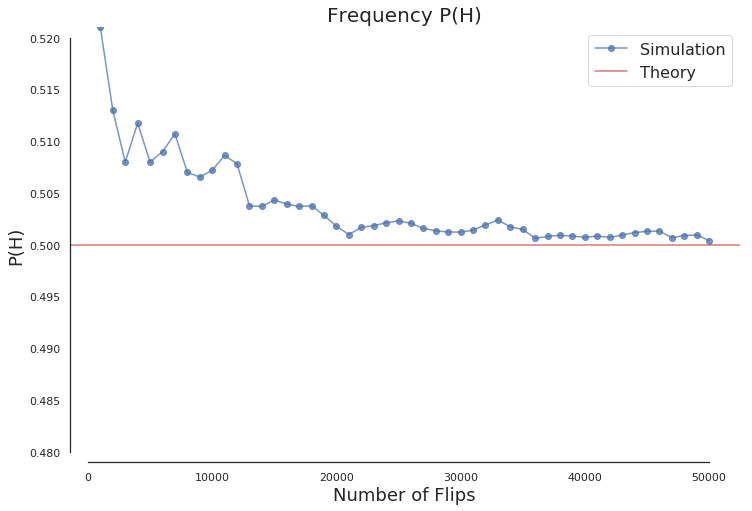

In [10]:
# Simulated probability of flipping heads
ph = 0.5

# Number of heads to compute
total = 50000 ; size = 1000

# Sampling array to plot coin flips
attempts = np.arange(size, total + size, size)

# Simulate coin flips
flips = flip_coin(total, ph)

# Accumulate head frequencies
results = [np.sum(flips[:idx] == 'H')/np.float(idx) for idx in attempts]

# Make plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot simulated flips
ax.plot(attempts, results , 'o-', alpha=0.75, label='Simulation')

# Plot theoretical expectation
ax.axhline(ph, 0, 1, color='r', alpha=0.75, label='Theory')

# Annotate plot
ax.legend(fontsize=16)
ax.set_title('Frequency P(H)',  fontsize=20)
ax.set_xlabel('Number of Flips',  fontsize=18)
ax.set_ylabel('P(H)', fontsize=18) 

# Compute y limits (how far above or below P(H) to display)
yp = abs(max(results) - ph)
yn = abs(min(results) - ph)

y_delta = max(yp, yn)

ax.set_ylim(ph - y_delta, ph + y_delta)

sns.despine(trim=True)

-----

<font color='red' size = '5'> Student Exercise </font>

Change the probability of heads to a lower and higher value in the code snippet above (i.e., `ph`). How does the plot change?

-----

## Probability Density

When we have multiple outcomes, each with their own probability (which might all be equal), we can construct a functional representation of the possible end states. This function is called the [**Probability Density Function**][wpdf] or **PDF**. A PDF can be constructed by normalizing each outcome by the total number of outcomes. Note that for discrete data, such as simulated coin flips, rolling a die, or selecting cards from a deck, an alternative name, **Probability Mass Function** or **PMF** is often used. This simple approach can often provide unique insights into a data set. For example, the PDF clearly indicates the mode, which is the point of highest probability in the PDF. Furthermore, the shape of the PDF can indicate whether a data set is skewed, or has long tails. A probability density function for a random variable $X$ is typically denoted by $f_X(x)$, and is related to the probability of an event occurring through an integration over the space of interest.

$$ P(a \leq x \leq b) = \int_a^b  f_X(x)\ dx $$

The probability mass function is simply the discrete version of this result, which instead is a sum over the discrete probabilities.

$$ P(a \leq x \leq b) = \sum_a^b  f_X(x) $$

In either case, the probability density (or mass) function is normalized to unit probability over the range of interest (for example from $[-\infty, \infty]$).

To demonstrate how to construct a probability mass function, we first simulate the rolling of a single die ten times in the following code cell. This code performs the simulation, assuming a fair die, and plots the accumulated outcomes. In the following code cell, we repeat this process, but for two, larger numbers of die rolls. In each of these two cases, we normalize the data so that a probability mass function is displayed. In addition, we show the expected probability for a fair, six-sided die. Notice how the simulated PMF approaches the _true_ probability as the number of simulated die rolls increases. This is another manifestation of the _Law of Large Numbers_.

------
[wpdf]: https://en.wikipedia.org/wiki/Probability_density_function

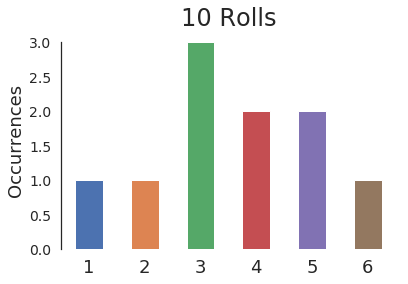

In [11]:
# Define our die to have six sides with equal probability
num_sides = 6
prob_die = num_sides * [1./num_sides]
times = 10    # Number of times to flip the coin
   
# Simulate numerical dice roll
def roll_die(N, prob = prob_die, num_sides = 6):
    return np.random.choice(np.arange(1, num_sides + 1), size=N, p=prob)

# Accumulate dice rolls
rolls = roll_die(times, prob_die, num_sides)

# Now histogram them, two bins, heads or tails
results, bins = np.histogram(rolls, bins=num_sides)
    
# For simplicity turn into a Pandas Series.
rolls = pd.Series(results, index=np.arange(1, num_sides + 1))
    
# Draw expected probability
ax.axhline(xmin=0.01, xmax=1.5, y=times/6, c='c', linestyle='-.')

# Now plot the die roll results
ax = rolls.plot.bar(fontsize=14, rot='horizontal')
ax.set_title(f'{times} Rolls', fontsize=24)
ax.set_ylabel("Occurrences", fontsize=18)
ax.set_xticklabels(np.arange(1, 7), fontsize = 18)

# Clean up plot
sns.despine(trim='True', bottom=True)

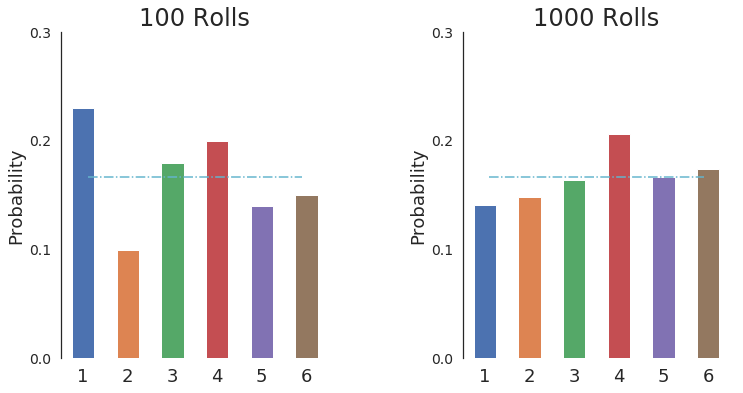

In [12]:
from numpy import random

# Define our die to have six sides with equal probability
num_sides = 6
prob_die = num_sides * [1./num_sides]

# Convenience Function to roll a die x *times*, and plot the results.
def plot_dice_pmf(ax, times, p, ns = num_sides, ):
  
    # Build an array of die rolls
    rolls = roll_die(times, p, ns)
    
    # Now histogram them.
    results, bins = np.histogram(rolls, bins=ns)
    
    # For simplicity turn into a Pandas Series.
    rolls = pd.Series(results, index=np.arange(1, ns + 1)) / np.sum(results)

    # Plot the expected results
    ax.axhline(xmin=0.1, xmax=0.9, y=1/ns, c='c', linestyle='-.')

    # Now plot the dice roll results
    ax = rolls.plot.bar(ax=ax, fontsize=14, rot='horizontal', yticks=[0, 0.1, 0.2, 0.3])
    ax.set_title(f'{times} Rolls', fontsize=24)
    ax.set_ylabel("Probability", fontsize=18)   
    ax.set_xticklabels(np.arange(1, 7), fontsize = 18)
    sns.despine(trim='True', left = False, bottom=True)

# Compare two dice rolls flips
fig, axs = plt.subplots(figsize=(12, 6), nrows=1, ncols=2)#, sharey=True)
adj = plt.subplots_adjust(hspace=1.5, wspace=0.5)

# We will roll a die 100 and then 1000 times and compare results
plot_dice_pmf(axs[0], 100, prob_die, num_sides)
plot_dice_pmf(axs[1], 1000, prob_die, num_sides)

-----

## Estimating Probability

To this point, we have discussed probabilities from a theoretical perspective. By inferring the likelihood of an event (such as rolling a die and getting an ace or flipping a coin and getting a heads), we were able to simulate all possible outcomes. In general, however, our knowledge of the world is limited by the data that we observe. Fortunately, many of the concepts that were previously introduced can be applied to these real-world cases by interpreting data distributions as probabilities. For example, we can translate a sample of restaurant receipts into the probability that a group of patrons will generate a total bill within a specific range. The next section introduces this concept more formally, by demonstrating how to construct a PDF from a data set.

### Empirical PDF

Given a data set, we can compute a probability density function by simply binning the data and normalizing the bin counts to ensure unit probability over the entire set of bins. As previously stated, a PDF can often provide unique insights into a data set. A PDF can also be useful as we attempt to infer future behavior. Given a representative data set, an empirically constructed PDF can be used to model future expectations. For example, if one constructs a PDF of fraud occurring in a company's financial record as a function of the total amount involved, one can infer how likely fraud might be in a new audit. Of course, the accuracy of any prediction is strongly dependent as always on the quality of data being analyzed, so it is important to acquire a fair and representative sample.

We demonstrate this concept in the following code cell, where we create a probability mass function for the `total_bill` column in the _tip_ data set. This distribution clearly shows that most bills are ten and twenty-five dollars, with a long tail to higher amounts. In addition, notice how the probability is low for any given bin. This is a result of our normalization, because the total probability for any given bin is the product of the bin width and this probability. Since we have ten bins that are each five dollars wide, the probability of a `total_bill` lying within one of the highest two bins is actually closer to 25\%. 

------

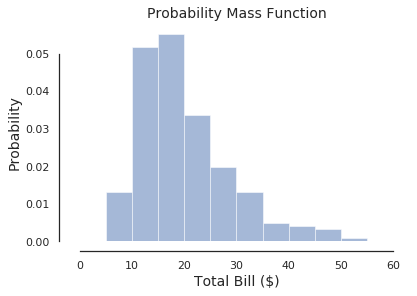

In [13]:
# Load the data
tips = sns.load_dataset('tips')

# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots()

# Now we want to make a default histogram
ax.hist(tips['total_bill'], normed=True, bins=10, range=(5, 55), alpha = .5)

# Set our axis limits, labels, and plot title
ax.set_title("Probability Mass Function", fontsize=14)

ax.set_xlim(-2,62)
ax.set_xlabel("Total Bill (\$)", fontsize=14)

ax.set_ylabel("Probability", fontsize=14)

# Clean up final result
sns.despine(offset=10, trim=True)

-----

### CDF

The probability density (or mass) function provides a concise summary of the likelihood of finding a given value (such as the `total_bill` shown above). In some cases, however, we wish to explore the distribution in its entirety, in order to ask question such as _What is the median price for a total bill?_ In these cases, an alternative form for the probability distribution is used, the [**Cumulative Density Function**][wcdf] or **CDF**. This form of the probability distribution contains the cumulative probability up to a specific value, as opposed to the differential probability at a given value. 

As a result, the CDF enables one to find the value at which the cumulative probability has reached a certain threshold, such as $50$\% for the median, or the quantile values. This is demonstrated in the following code cell, where we generate a _cumulative_ histogram for the `total_bill` column in the _tips_ data set. From the resulting figure, one can see that the median bill is around twenty dollars.

----
[wcdf]: https://en.wikipedia.org/wiki/Cumulative_distribution_function

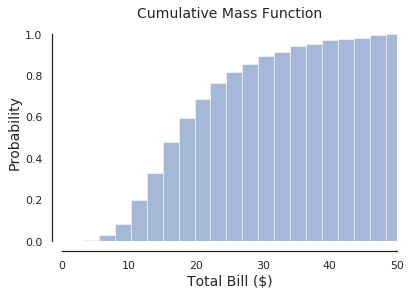

In [14]:
tips = sns.load_dataset('tips')

# Now we create our figure and axes for the plot we will make.
fig, ax = plt.subplots()

# Now we want to make a default histogram
ax.hist(tips['total_bill'], normed=True, bins=20, cumulative=True, alpha = .5)

# Set our axis limits, labels, and plot title
ax.set_title("Cumulative Mass Function", fontsize=14)

ax.set_xlim(0, 50)
ax.set_xlabel("Total Bill (\$)", fontsize=14)

ax.set_ylabel("Probability", fontsize=14)

# Clean up final result
sns.despine(offset=10, trim=True)

-----

<font color='red' size = '5'> Student Exercise </font>

In the empty **Code** cell below, write and execute code to make a new cumulative density plot (like the one above, but split out lunch and dinner for the `total_bill` column). Plot the two histograms in separate colors.



-----

------

### Comparing Probability Distributions

The probability density (or mass) function informs a viewer of the likelihood of a particular event occurring. For example, we can see from the `total_bill` PMF that the `total_bill` is more likely to be around twenty dollars than forty dollars. We can go beyond this, however, if we have two probability distributions that have been derived from the same data. For example, if we split the `total_bill` PMF by `time` into a lunch and dinner PMF, we can directly compare the likelihood for the `total_bill` at these two times by simply dividing the two PMFs.

We demonstrate this concept in the following code cell, where we use the NumPy [histogram][nh] function to generate binned counts from the two data sets of interest. Next, we normalize each of these two histograms to convert them into probability mass functions. Finally, we plot the difference between these probability mass functions. The resulting plot clearly shows that lunch bills are generally smaller than dinner bills, since the difference is negative for lower values of `total_bill`, and generally positive at higher values. Note that the largest values for `total_bill` have smaller differences indicating that the result is more ambiguous (or in other words, the largest `total_bill` values can occur at either lunch or dinner).

----
[nh]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html

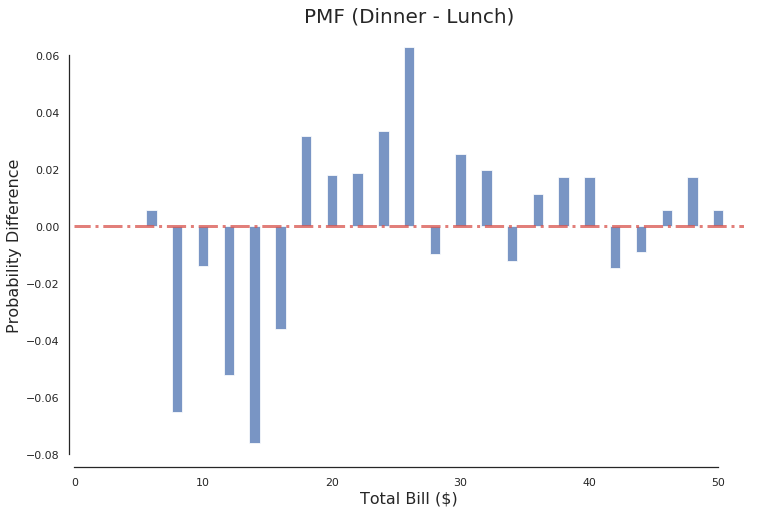

In [15]:
# Collect our two data sets as Numpy arrays
data_tips = []
data_tips.append(tips.loc[tips.time == 'Lunch', ['total_bill']].as_matrix())
data_tips.append(tips.loc[tips.time == 'Dinner', ['total_bill']].as_matrix())

fig, ax = plt.subplots(figsize=(12, 8))

# Compute and normalize histograms of two data sets.
h1, _ = np.histogram(data_tips[0], density=False, bins=25, range=(5, 55))
h1n = h1 / np.sum(h1)

h2, be = np.histogram(data_tips[1], density=False, bins=25, range=(5, 55))
h2n = h2 / np.sum(h2)

# Compute bin centers from the edges returned from np.histogram
bins = be[:-1] + (be[1] - be[0])/2

# Plot the PMF difference
ax.bar(bins, (h2n - h1n), alpha =0.75)

ax.set_title("PMF (Dinner - Lunch)", fontsize=20)

ax.set_xlim(0,52)
ax.set_xlabel("Total Bill (\$)", fontsize=16)
ax.axhline(0, 60, 0, linewidth=3, linestyle ='-.', color=sns.xkcd_rgb["pale red"], alpha = 0.75)
ax.set_ylabel("Probability Difference", fontsize=16)

sns.despine(offset = 5, trim=True)

-----

## Joint Probability

The world is rarely one-dimensional. Often, we will want to understand how different features, or variables, are related or affect a particular result. In these cases, we will want to analyze the [joint probability][wjp] of two events occurring. Formally, the joint probability of $a$ and $b$ occurring is $P(a, b)$. This is demonstrated in the following code cells, where first compute a binned, two-dimensional representation of the `total_bill` and `tip` features from the _tips_ data set. This joint representation is next visualized as the _joint probability_ of a particular instance having specific values for both of these features simultaneously.

The construction of this two-dimensional histogram uses two new methods:
- [`histogram2d`][nph], which computes the two-dimensional representation of the two one-dimensional arrays
- [`meshgrid`][nmg], which creates a grid of edges in this two-dimensional space to visualize the binned data

-----
[nph]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html
[nmg]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html
[wjp]: https://en.wikipedia.org/wiki/Joint_probability_distribution

[nph2d]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html

[npmg]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html


In [16]:
xb = np.arange(3, 51, 1)
yb = np.arange(1, 11, 1)

tdata, xedges, yedges = np.histogram2d(tips.total_bill, tips.tip, bins=[60, 15])
tdata /= np.sum(tdata)

xe, ye = np.meshgrid(xedges, yedges)

-----

The previous code cell generated a two-dimensional, binned representation of our data. The following code cell first displays this two-dimensional representation, before adding custom annotations to highlight specific regions. While not frequently used, annotations, such as the circles, ext, and arrows used in the following figure, can help guide a reader to the important values. Adding these decorations to a figure is fairly straightforward in [matplotlib][mataa], and essentially consists of creating the desired annotation (_Circle_, _Text_, etc.) and adding it to the figure in the desired location. After reading through this notebook, you should try changing these annotations, or adding new ones, to learn how to add, move, and change annotations on a matplotlib figure.

-----

[mataa]: https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.annotate.html?highlight=annotate#matplotlib.axes.Axes.annotate

Joint Probability Examples

P(Total Bill = $10, Tip = $2) = 0.033
P(Total Bill = $15, Tip = $3) = 0.008


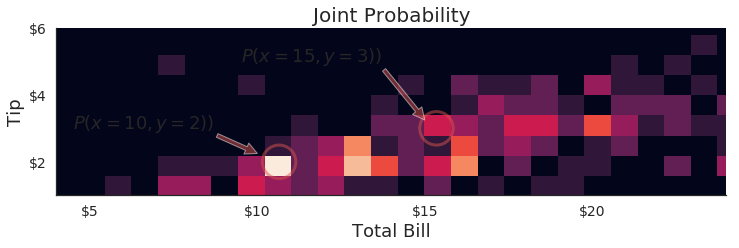

In [17]:
from matplotlib.patches import Circle

# Setup figure
fig, ax = plt.subplots(figsize=(12, 6))

# We make our own heatmap, rather than use Seaborn's heatmap, since we
# have a non-standard case here. Set equal aspect so we get square pixels.
ax.pcolormesh(xe, ye, tdata.T)
ax.set_aspect('equal')

# Set labels and titles
ax.set_xlabel('Total Bill', fontsize=18)
ax.set_ylabel('Tip', fontsize=18)
ax.set_title('Joint Probability', fontsize=20)

# Set x limits, ticks, and tick labels
ax.set_xticks([5, 10, 15, 20])
ax.set_xticklabels(['$5', '$10', '$15', '$20'], fontsize=14)
ax.set_xlim(4, 24)

# Set y limits, ticks, and tick labels
ax.set_yticks([2, 4, 6])
ax.set_yticklabels(['$2', '$4', '$6'], fontsize=14)
ax.set_ylim(1, 6)

# Annotate plot

# First, we draw a circle around the rough pixel and
# add annotative text and arrow
ax.add_patch(Circle((10.65, 2), 0.5, color=sns.xkcd_rgb["pale red"], fill=False, lw=3, alpha=0.5))
ax.annotate(r'$P(x=10, y=2))$', xy=(10, 2.25), xytext=(4.5, 3.0), xycoords='data', fontsize=18, 
            arrowprops=dict(facecolor=sns.xkcd_rgb["pale red"], alpha = 0.5))

# Add second annotation
ax.add_patch(Circle((15.35, 3), 0.5, color=sns.xkcd_rgb["pale red"], fill=False, lw=3, alpha=0.5))
ax.annotate(r'$P(x=15, y=3))$', xy=(15, 3.25), xytext=(9.5, 5.0), xycoords='data', fontsize=18, 
            arrowprops=dict(facecolor=sns.xkcd_rgb["pale red"], alpha = 0.5))

# Clean-up plot
sns.despine(trim=False)

# Display Joint Probability
print('Joint Probability Examples\n')
print('P(Total Bill = $10, Tip = $2) = {:4.3f}'.format(tdata[9, 1]))
print('P(Total Bill = $15, Tip = $3) = {:4.3f}'.format(tdata[14, 2]))

-----

## Conditional Probability

We often need to calculate the probability of one variable given a second (or more) variable has a certain value or is within a certain range. This is known as [conditional probability][wcp], since we are computing a probability of one variable conditioned on the value of a second variable. Formally, the conditional probability of event $a$ occurring, given the probability for a second event $b$, is written as $P(a | b)$. If two events are independent, then the conditional probability is equivalent to the individual probability of the event itself occurring. Thus, if $a$ and $b$ are independent, $P(a|b) = P(a)$.

We demonstrate conditional probability in the following two code cells. First, we once again compute and display the joint probability of `total_bill` and `tip` from the _tips_ data set. But in this case, we also draw two sets of vertical lines. Next, we select data from the _tips_ data set that lie within these regions, specifically, by selecting data from the `total_bill` column. Finally, we display histogram representations of the data from the `tip` column for these selected data. These histograms represent the conditional probability for the `tip` column, given the `total_bill` was within a specific range. Conditional probability is an important concept that forms the basis for Bayes theorem, which will be demonstrated later in this notebook.

-----
[wcp]: https://en.wikipedia.org/wiki/Conditional_probability

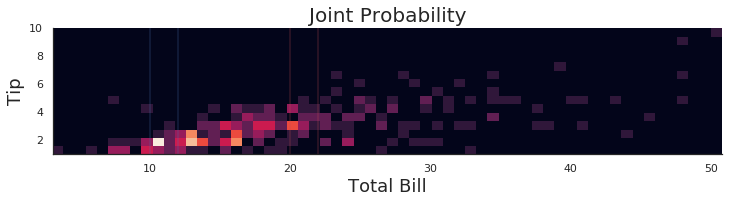

In [18]:
# Setup figure
fig, ax = plt.subplots(figsize=(12, 6))

# We make our own heatmap, rather than use Seaborn's heatmap, since we
# have a non-standard case here. Set equal aspect so we get square pixels.
ax.pcolormesh(xe, ye, tdata.T)
ax.set_aspect('equal')

# Add first conditional region (draw parallel blue lines)
low1 = 10.0 ; high1 = 12.0

ax.axvline(low1, 0, 10, c='b', alpha=0.25)
ax.axvline(high1, 0, 10, c='b', alpha=0.25)

# Add second conditional region (draw parallel red lines)
low2 = 20.0 ; high2 = 22.0

ax.axvline(low2, 0, 10, c='r', alpha=0.25)
ax.axvline(high2, 0, 10, c='r', alpha=0.25)

# Label and show plot
ax.set_xlabel('Total Bill', fontsize=18)
ax.set_ylabel('Tip', fontsize=18)
ax.set_title('Joint Probability', fontsize=20)

# Clean-up plot
sns.despine(trim=False)

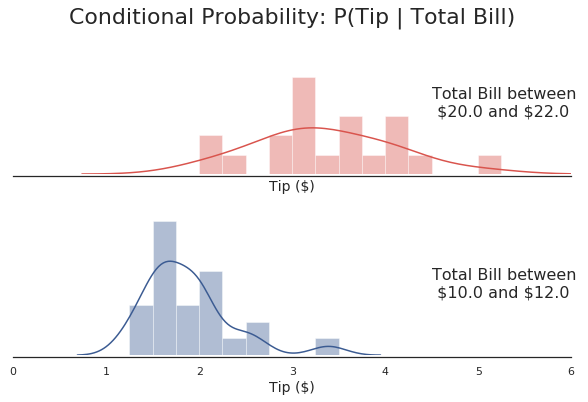

In [19]:
# Generate two histograms for the conditional probability

data_tips = []
data_tips.append(tips[(tips.total_bill >= low2) & (tips.total_bill <= high2)].tip.as_matrix())
data_tips.append(tips[(tips.total_bill >= low1) & (tips.total_bill <= high1)].tip.as_matrix())

# Define plot colors and titles
clr = [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["denim blue"]]

# Define low and high ranges
low = [low2, low1]
high = [high2, high1]

# Create figure
fig, axs = plt.subplots(figsize=(10, 6), nrows=2, ncols=1, sharex=True)
adj = plt.subplots_adjust(hspace=0.25)

# Title plot
axs[0].set_title('Conditional Probability: P(Tip | Total Bill)', ha='center', fontsize=22)

# Make each subplot
for idx, data in enumerate(data_tips):
    
    # Rugplot, with set rug height, thickness, and color
    sns.distplot(data, ax = axs[idx], bins=np.arange(1, 11, 0.25), color = clr[idx])
    
    # No y-axis
    axs[idx].set_yticks([])
    
    # Define axes limits and label
    axs[idx].set_xlim(0, 6)
    axs[idx].set_ylim(0, 1.5)
    axs[idx].set_xlabel('Tip (\$)', fontsize=14)

    #Annotate each plot with the total bill range
    axs[idx].annotate('Total Bill between \n \${0} and \${1}'.format(low[idx], high[idx]), 
                      xycoords='data', fontsize=16, xytext=(4.5, 0.6), xy=(4.5, 0.6))
    
    # Clean up each plot
    sns.despine(ax=axs[idx], left=True, offset=2, trim=True)

-----

## Marginal Probability

Given variables whose joint probability distribution is known, such as the relation demonstrated above between `total_bill` and `tip`, we can construct the _marginal probability distribution_ by summing (or integrating for a continuous probability distribution) over the probability of one (or more) events in the joint probability distribution. Formally, given a joint probability $P(x, y)$ the marginal distribution $P(x)$ can be calculated

$$P(x) = \sum_y P(x, y) = \sum_y P(x | y) P(y)$$

where we have related the joint probability $P(x, y)$ to the conditional probability $P(x | y) P(y)$. The term marginal is used to describe this probability distribution because the probability that $x$ occurs has been determined by marginalizing over the remaining variables, which are effectively discarded.

We can demonstrate the computation of a marginal probability distribution by summing over one of the axes in the two-dimensional histogram we created to display the joint probability of `tip` and `total_bill`. The following code cell demonstrates this, and also uses the edges (minus the far-right edge) determined by the NumPy `histogram2d` function, before plotting the one-dimensional marginal probability distributions as histograms (or specifically bars). 

Note that this computation can also be understood visually by looking at the graph shown above of the joint distribution between `tip` and `total_bill`. The marginal distribution for `total_bill` would be found by collapsing the vertical axis of that graph, and the marginal distribution for `tip` would be found by collapsing the horizontal axis of that graph.

-----

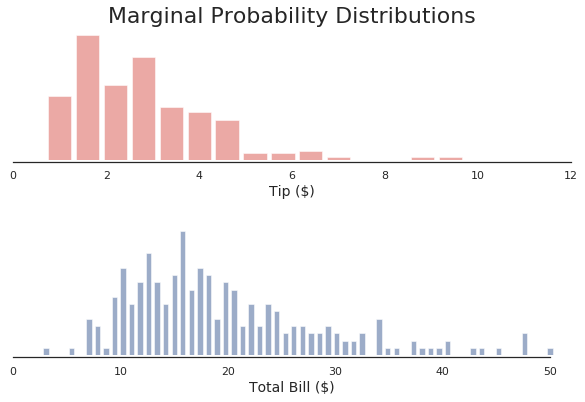

In [20]:
# Create our marginal probability distributions by
# summing the binned counts, recall tdata was normalized
mp= []
mp.append(np.sum(tdata, axis=0))  # tips
mp.append(np.sum(tdata, axis=1)) # total_bill

# Build our edge array for plotting bars 
# (drop last one, which is far-right edge)
edges = [yedges[:-1], xedges[:-1]]

# Define plot colors and titles
clr = [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["denim blue"]]
xlbls = ['Tip', 'Total Bill']
xmax = [12, 52]

# Create figure
fig, axs = plt.subplots(figsize=(10, 6), nrows=2, ncols=1, sharex=False)
adj = plt.subplots_adjust(hspace=0.5)

# Title plot
axs[0].set_title('Marginal Probability Distributions', ha='center', fontsize=22)

# Make each subplot
for idx, data in enumerate(mp):
    
    # Rugplot, with set rug height, thickness, and color
    axs[idx].bar(edges[idx], mp[idx], width=0.5, color = clr[idx], alpha=0.5)
    
    # No y-axis
    axs[idx].set_yticks([])
    
    # Define axes limits and label
    axs[idx].set_xlim(0, xmax[idx])
    axs[idx].set_xlabel(f'{xlbls[idx]} (\$)', fontsize=14)

    # Clean up each plot
    sns.despine(ax=axs[idx], left=True, offset=2, trim=True)

-----

## Bayes Theorem

In a previous reading you learned about Bayes theorem, which relates conditional probabilities in a way that enables a hypothesis to be tested given an observed data set. This analysis starts with the fact that for two events $a$ and $b$, the conditional probabilities must be equal, thus $P(a | b) P(b) = P(b | a) P(a)$. If we express this as relation in terms of a Hypothesis $H$ and observed data $D$, the relation becomes Bayes theorem:

$$ P(H | D) = \frac{P(D | H) P(H)}{P(D)}$$

This reads, the probability of obtaining the hypothesis given the observed data is equal to the probability of the data given the hypothesis times the prior probability of observing the data normalized by the probability of the hypothesis.

In the Bayesian approach, we first construct a hypothesis, for example, that we are flipping a biased coin whose probability of obtaining heads is $P(H) = x$. Second, we encode our prior knowledge into a functional form, for example, that we have equally likely probability of getting either a heads or tails when flipping our coin. Finally, we compute our likelihood of obtaining a set of coin flips given the observed data. Rather than flipping a coin repeatedly, we will resort to simulations that generate a likelihood directly by using the binomial distribution.

We demonstrate this approach in the following code cell, where we first compute the prior probability of observing  $h$ heads in $n$ coin flips for a fair coin with $P(H) = 0.5$. This value is constant, regardless of how many coin flips we might simulate since the probability is uniform. Next, we simulate coin flips by using the binomial distribution. Since we want to sample uniformly over the probability space from zero to one, we write our own binomial function (and we ignore the combinations since we will normalize the result to generate a probability). Finally, we combine the likelihood and prior to generate the posterior, which we plot. We repeat this process for increasingly large numbers of coin flips. As we do this, the likelihood swamps the prior and eventually converges strongly to the _known_ biased value. This simple example demonstrates the importance of data in defining the posterior.

-----

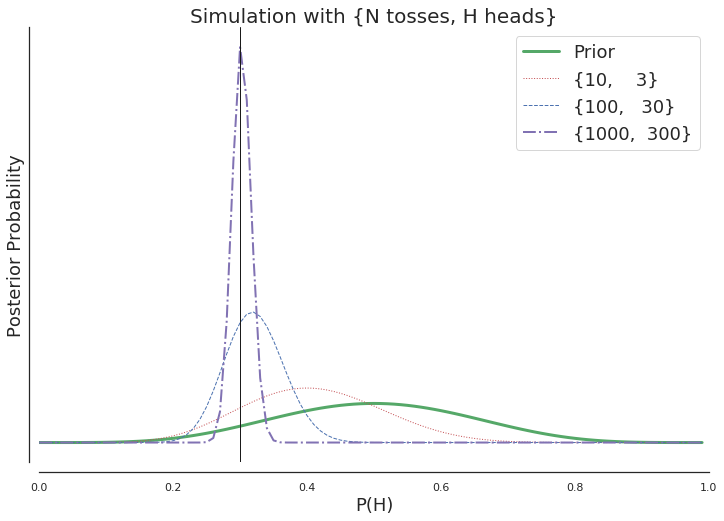

In [21]:
# Bias value
bc = 0.3

# We flip n coins and observe h heads,
def binomial(data, n, h):
    # We can ignore the combination since it divides out in the normalization
    # Build up our probabilities
    p = [(x**h * (1 - x)**(n - h)) for x in data]
    
    # Normalize probabilities
    return (p / sum(p))


fig, ax = plt.subplots(figsize=(12, 8))

# Sample points
x = np.arange(0.0, 1.0, 0.01)

# Prior is fair coin, so we assume 10 flips, 5 heads.
prior = binomial(x, 10, 5)
ax.plot(x, prior, linewidth=3, color='g', linestyle='-', label='Prior')

# Now simulate posterior for biased coin

# First, 10 coin flips
num_flips = 10
likelihood1 = binomial(x, num_flips, num_flips * bc)
post1 = likelihood1 * prior
post1 /= np.sum(post1)
ax.plot(x, post1, linewidth=1, color='r', linestyle=':', 
        label=f'{{{num_flips}, {num_flips * bc:4.0f}}}')

# Second, 100 coin flips
num_flips = 100
likelihood2 = binomial(x, num_flips, num_flips * bc)
post2 = likelihood2 * prior
post2 /= np.sum(post2)
ax.plot(x, post2, linewidth=1, color='b', linestyle='--', 
        label=f'{{{num_flips}, {num_flips * bc:4.0f}}}')

# Third, 1000 coin flips
num_flips = 1000
likelihood3 = binomial(x, num_flips, num_flips * bc)
post3 = likelihood3 * prior
post3 /= np.sum(post3)
ax.plot(x, post3, linewidth=2, color='m', linestyle='-.', 
        label=f'{{{num_flips}, {num_flips * bc:4.0f}}}')

# Decorate plot
ax.set_xlabel("P(H)", fontsize=18)
ax.set_ylabel("Posterior Probability", fontsize=18)
ax.set_title("Simulation with {N tosses, H heads}", fontsize=20)
ax.set_xlim(0, 1)
ax.set_yticks([])

# Plot biased coin value
ax.axvline(bc, 0, 1, c='k', linewidth=1, linestyle='-')
ax.legend(loc=1, fontsize = 18)

# Clean-up
sns.despine(offset = 10, trim=True)

-----

<font color='red' size = '5'> Student Exercise </font>

In the empty **Code** cell below, write and execute code to apply Bayes theorem for a loaded six-sided die. Assume the probability of rolling a three is 0.25, and that each of the remaining probabilities are uniform. Assume a uniform prior across the six numbers, and sample from the appropriate function to generate a likelihood to compute and display the prior.

-----

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

1. [Statistics tutorial][2] from Scipy
4. [Probability chapter][4] from the _IPython Cookbook_ by Cyrille Rossant
10. Somewhat dated blog article on simple [statistic analysis in Python][oneau]
3. The [probability chapter][fb] from the book _Feynman Lectures on Physics_ by Richard Feynman

-----

[oneau]: https://oneau.wordpress.com/2011/02/28/simple-statistics-with-scipy/
[2]: https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html
[4]: https://ipython-books.github.io/featured-07/
[fb]: http://www.feynmanlectures.caltech.edu/I_06.html

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode